# Final Project Sketch :）


In [2]:
import pandas as pd
import numpy as np
import os
from math import sin, cos, sqrt, atan2, radians
import datetime
pd.set_option('display.max_columns', 500)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./My Project 14295-223aab171173.json"
from google.cloud import bigquery
client = bigquery.Client()
import pandas as pd  #pandas for using dataframe and reading csv 
import numpy as np   #numpy for vector operations and basic maths 
#import simplejson    #getting JSON in simplified format
import urllib        #for url stuff
#import gmaps       #for using google maps to visulalize places on maps
import re            #for processing regular expressions
import datetime      #for datetime operations
import calendar      #for calendar for datetime operations
import time          #to get the system time
import scipy         #for other dependancies
from sklearn.cluster import KMeans # for doing K-means clustering
#from haversine import haversine # for calculating haversine distance
import math          #for basic maths operations
import seaborn as sns #for making plots
import matplotlib.pyplot as plt # for plotting
import os  # for os commands
from scipy.misc import imread, imresize, imsave  # for plots 
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook, show
from IPython.display import HTML
from matplotlib.pyplot import *
from matplotlib import cm
from matplotlib import animation
import io
import base64
output_notebook()
plotly.offline.init_notebook_mode() # run at the start of every ipython notebook
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='zxf71699', api_key='BkltlyEFcOkOAgCSdkjt')
import seaborn as sns
import matplotlib.pyplot as plt 
import time

Loading BokehJS ...

## Query Data from BigQuery

In [3]:
start = time.time()
query = (
"""
SELECT date_of_year, month_of_year, day_of_year, pickup_hour,
    dropoff_datetime,pickup_datetime,
    pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude, travel_time, passenger_count,
    temp, visib,mxpsd,wdsp,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder
FROM
(
      SELECT *,ROW_NUMBER() OVER(partition by date_of_year, pickup_hour) as row_number
      FROM
      (
            SELECT pickup_datetime, dropoff_datetime, pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, passenger_count,
            EXTRACT (HOUR FROM pickup_datetime) as pickup_hour,
            EXTRACT (DAY FROM pickup_datetime) as day_of_year,
            EXTRACT (MONTH FROM pickup_datetime) as month_of_year,
            EXTRACT (DATE FROM pickup_datetime) as date_of_year,
            TIMESTAMP_DIFF(TIMESTAMP(dropoff_datetime), TIMESTAMP(pickup_datetime), SECOND) as travel_time
            FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2016`
            WHERE pickup_latitude IS NOT NULL AND pickup_longitude IS NOT NULL and
                dropoff_longitude IS NOT NULL and dropoff_latitude IS NOT NULL
      ) x
) x
JOIN
(
 select cast(mo as int64) as month,cast(da as int64) as day,temp,visib,mxpsd,wdsp,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder
 from `bigquery-public-data.noaa_gsod.gsod2016` where stn='725053'
) y on x.month_of_year = y.month and x.day_of_year = y.day
where x.row_number <= 200
"""
)
data=pd.io.gbq.read_gbq(query,dialect='standard')
end = time.time()
print("Time taken by above cell is {}.".format((end-start)/60))

Time taken by above cell is 3.613306685288747.


In [4]:
data.head()

date_of_year  month_of_year  day_of_year  pickup_hour    dropoff_datetime  \
0   2016-01-24              1           24           14 2016-01-24 14:07:08   
1   2016-01-24              1           24           14 2016-01-24 15:01:41   
2   2016-01-24              1           24           14 2016-01-24 15:10:29   
3   2016-01-24              1           24           14 2016-01-24 14:27:57   
4   2016-01-24              1           24           14 2016-01-24 14:07:56   

      pickup_datetime  pickup_longitude  pickup_latitude  dropoff_longitude  \
0 2016-01-24 14:02:56        -73.971466        40.781807         -73.959869   
1 2016-01-24 14:47:04        -73.962273        40.770428         -73.980812   
2 2016-01-24 14:58:52        -74.014694        40.709827         -74.004402   
3 2016-01-24 14:25:46        -73.967033        40.760910         -73.960648   
4 2016-01-24 14:01:36        -73.922768        40.743809         -73.922295   

   dropoff_latitude  travel_time  passenger_count  temp  visib mxpsd wdsp  \
0         40.780441          252                5  26.7    7.4  17.1  6.3   
1         40.767666          877                1  26.7    7.4  17.1  6.3   
2         40.733479          697                1  26.7    7.4  17.1  6.3   
3         40.766449          131                1  26.7    7.4  17.1  6.3   
4         40.754883          380                6  26.7    7.4  17.1  6.3   

   gust   max   min  prcp  sndp fog rain_drizzle snow_ice_pellets hail thunder  
0  26.0  35.1  19.9  1.82   5.9   1            0                1    0       0  
1  26.0  35.1  19.9  1.82   5.9   1            0                1    0       0  
2  26.0  35.1  19.9  1.82   5.9   1            0                1    0       0  
3  26.0  35.1  19.9  1.82   5.9   1            0                1    0       0  
4  26.0  35.1  19.9  1.82   5.9   1            0                1    0       0

In [5]:
data.head()
data.to_csv("data.csv",index = False)

In [6]:
df = pd.read_csv("./data.csv")

In [7]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [8]:
df.head()

date_of_year  month_of_year  day_of_year  pickup_hour     dropoff_datetime  \
0   2016-01-24              1           24           14  2016-01-24 14:07:08   
1   2016-01-24              1           24           14  2016-01-24 15:01:41   
2   2016-01-24              1           24           14  2016-01-24 15:10:29   
3   2016-01-24              1           24           14  2016-01-24 14:27:57   
4   2016-01-24              1           24           14  2016-01-24 14:07:56   

      pickup_datetime  pickup_longitude  pickup_latitude  dropoff_longitude  \
0 2016-01-24 14:02:56        -73.971466        40.781807         -73.959869   
1 2016-01-24 14:47:04        -73.962273        40.770428         -73.980812   
2 2016-01-24 14:58:52        -74.014694        40.709827         -74.004402   
3 2016-01-24 14:25:46        -73.967033        40.760910         -73.960648   
4 2016-01-24 14:01:36        -73.922768        40.743809         -73.922295   

   dropoff_latitude  travel_time  passenger_count  temp  visib  mxpsd  wdsp  \
0         40.780441          252                5  26.7    7.4   17.1   6.3   
1         40.767666          877                1  26.7    7.4   17.1   6.3   
2         40.733479          697                1  26.7    7.4   17.1   6.3   
3         40.766449          131                1  26.7    7.4   17.1   6.3   
4         40.754883          380                6  26.7    7.4   17.1   6.3   

   gust   max   min  prcp  sndp  fog  rain_drizzle  snow_ice_pellets  hail  \
0  26.0  35.1  19.9  1.82   5.9    1             0                 1     0   
1  26.0  35.1  19.9  1.82   5.9    1             0                 1     0   
2  26.0  35.1  19.9  1.82   5.9    1             0                 1     0   
3  26.0  35.1  19.9  1.82   5.9    1             0                 1     0   
4  26.0  35.1  19.9  1.82   5.9    1             0                 1     0   

   thunder  
0        0  
1        0  
2        0  
3        0  
4        0

# Summary of Data

In [9]:
# Return high level information about data
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871016 entries, 0 to 2640
Data columns (total 26 columns):
date_of_year         871016 non-null datetime64[ns]
month_of_year        871016 non-null int64
day_of_year          871016 non-null int64
pickup_hour          871016 non-null int64
dropoff_datetime     871016 non-null datetime64[ns]
pickup_datetime      871016 non-null datetime64[ns]
pickup_longitude     871016 non-null float64
pickup_latitude      871016 non-null float64
dropoff_longitude    871016 non-null float64
dropoff_latitude     871016 non-null float64
travel_time          871016 non-null int64
passenger_count      871016 non-null int64
temp                 871016 non-null float64
visib                871016 non-null float64
mxpsd                871016 non-null object
wdsp                 871016 non-null object
gust                 871016 non-null float64
max                  871016 non-null float64
min                  871016 non-null float64
prcp                 871016

## Calculate Distance 

In [10]:
R = 6373.0

dlon = np.radians(data['dropoff_longitude']) - np.radians(data['pickup_longitude'])
dlat = np.radians(data['dropoff_latitude']) - np.radians(data['pickup_latitude'])

#a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
#c = 2 * atan2(sqrt(a), sqrt(1 - a))

a = np.sin(dlat / 2)**2 + np.cos(data['pickup_latitude']) * np.cos(data['pickup_longitude']) * np.sin(dlon / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

data['distance_in_km'] = R*c
data.head()

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning:

invalid value encountered in sqrt



date_of_year  month_of_year  day_of_year  pickup_hour    dropoff_datetime  \
0   2016-01-24              1           24           14 2016-01-24 14:07:08   
1   2016-01-24              1           24           14 2016-01-24 15:01:41   
2   2016-01-24              1           24           14 2016-01-24 15:10:29   
3   2016-01-24              1           24           14 2016-01-24 14:27:57   
4   2016-01-24              1           24           14 2016-01-24 14:07:56   

      pickup_datetime  pickup_longitude  pickup_latitude  dropoff_longitude  \
0 2016-01-24 14:02:56        -73.971466        40.781807         -73.959869   
1 2016-01-24 14:47:04        -73.962273        40.770428         -73.980812   
2 2016-01-24 14:58:52        -74.014694        40.709827         -74.004402   
3 2016-01-24 14:25:46        -73.967033        40.760910         -73.960648   
4 2016-01-24 14:01:36        -73.922768        40.743809         -73.922295   

   dropoff_latitude  travel_time  passenger_count  temp  visib mxpsd wdsp  \
0         40.780441          252                5  26.7    7.4  17.1  6.3   
1         40.767666          877                1  26.7    7.4  17.1  6.3   
2         40.733479          697                1  26.7    7.4  17.1  6.3   
3         40.766449          131                1  26.7    7.4  17.1  6.3   
4         40.754883          380                6  26.7    7.4  17.1  6.3   

   gust   max   min  prcp  sndp fog rain_drizzle snow_ice_pellets hail  \
0  26.0  35.1  19.9  1.82   5.9   1            0                1    0   
1  26.0  35.1  19.9  1.82   5.9   1            0                1    0   
2  26.0  35.1  19.9  1.82   5.9   1            0                1    0   
3  26.0  35.1  19.9  1.82   5.9   1            0                1    0   
4  26.0  35.1  19.9  1.82   5.9   1            0                1    0   

  thunder  distance_in_km  
0       0             NaN  
1       0             NaN  
2       0        2.584325  
3       0        0.556410  
4       0        1.231660

## Optimize the memory usage

In [11]:
# Create a function to be calculating memory usage
def get_usage(obj):
    if isinstance(obj, pd.DataFrame):
        usage = obj.memory_usage(deep=True).sum()
    else:
        usage = obj.memory_usage(deep=True)
    return "{:03.2f} MB".format(usage / (1024**2))

# Convert object to int
obj = data.select_dtypes(include = 'object')
obj_f32 = obj.apply(pd.to_numeric, downcast='unsigned')

# Convert int64 to int8
obj = data.select_dtypes(include = 'int64')
obj_int = obj.apply(pd.to_numeric, downcast='unsigned')

# Convert float64 to float32
obj = data.select_dtypes(include = 'float64')
obj_f = obj.apply(pd.to_numeric, downcast='float')

# Calculated the memory we reduced by down grade int and float
print("Original memory usage: ", get_usage(data))
data[obj_f32.columns] = obj_f32
data[obj_int.columns] = obj_int
data[obj_f.columns] = obj_f
print("After converting int and float memory usage: ", get_usage(data))

Original memory usage:  513.79 MB
After converting int and float memory usage:  93.87 MB


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871016 entries, 0 to 2640
Data columns (total 27 columns):
date_of_year         871016 non-null datetime64[ns]
month_of_year        871016 non-null uint8
day_of_year          871016 non-null uint8
pickup_hour          871016 non-null uint8
dropoff_datetime     871016 non-null datetime64[ns]
pickup_datetime      871016 non-null datetime64[ns]
pickup_longitude     871016 non-null float32
pickup_latitude      871016 non-null float32
dropoff_longitude    871016 non-null float32
dropoff_latitude     871016 non-null float32
travel_time          871016 non-null int64
passenger_count      871016 non-null uint8
temp                 871016 non-null float32
visib                871016 non-null float32
mxpsd                871016 non-null float64
wdsp                 871016 non-null float64
gust                 871016 non-null float32
max                  871016 non-null float32
min                  871016 non-null float32
prcp                 8710

## Process Missing Data & Outlier

### Latitude and Longitude

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: 

Time taken by above cell is 0.7987761497497559.


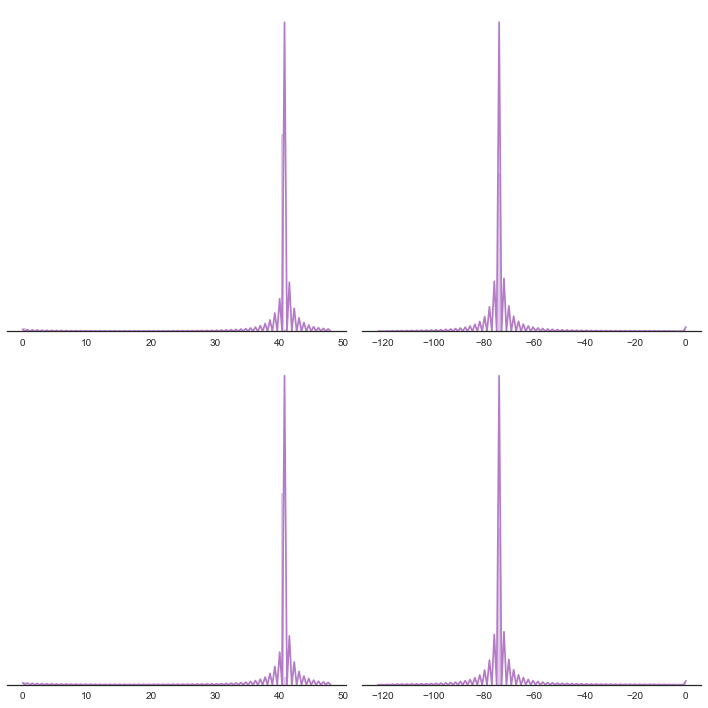

In [13]:
start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude',color="m",bins =100, ax=axes[0,1])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude',color="m",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
plt.show()

### Filter outliers of locations

In [14]:
#data['pickup_latitude'].hist(bins=20)
#data['pickup_longitude'].hist(bins=20)

data = data[(data['pickup_longitude'] >= -79.7624) & (data['pickup_longitude'] <= -71.7517) &
                    (data['pickup_latitude'] >= 40.4772) & (data['pickup_latitude'] <= 45.0153)]

data = data[(data['dropoff_longitude'] >= -79.7624) & (data['dropoff_longitude'] <= -71.7517) &
                    (data['dropoff_latitude'] >= 40.4772) & (data['dropoff_latitude'] <= 45.0153)]

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: 

Time taken by above cell is 0.8620080947875977.


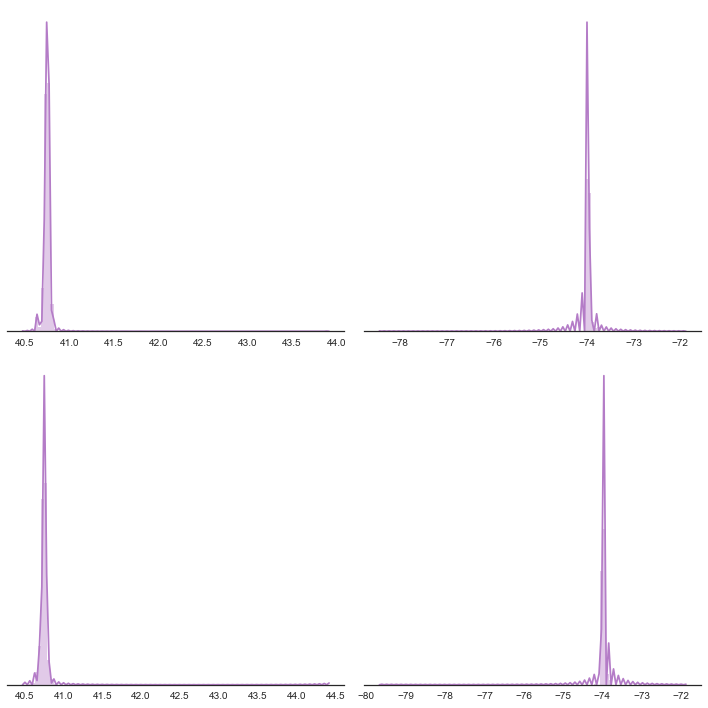

In [15]:
start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude',color="m",bins =100, ax=axes[0,1])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude',color="m",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
plt.show()

### Distance

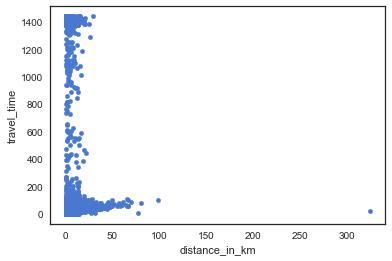

In [16]:
data['travel_time'] = data.travel_time/60
data.plot(x='distance_in_km',y='travel_time',kind='scatter')

In [17]:
data["weekday"] = data['pickup_datetime'].dt.dayofweek # Set day of week
data_small = data.loc[data['distance_in_km'] > 0.1,]

In [18]:
data = data.loc[(data['travel_time']>0) & (data['distance_in_km']<50)  &  (data['travel_time'] > 2) & (data['travel_time'] < 1000) ]

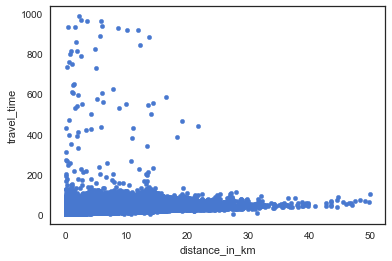

In [19]:
data.plot(x='distance_in_km',y='travel_time',kind='scatter')

In [20]:
data1 = data.copy()

### Preprocessing Weather variables

In [21]:
# refit visib 
for i in data.loc[(data['visib']== 999.9), 'date_of_year'].unique():
    data.loc[data['date_of_year'] == i,'visib'] =  data.loc[data['date_of_year'] == pd.to_datetime(i) - datetime.timedelta(1),'visib'].unique()

In [22]:
# refit mxpsd
for i in data.loc[(data['mxpsd']== 999.9), 'date_of_year'].unique():
    data.loc[data['date_of_year'] == i,'mxpsd'] =  data.loc[data['date_of_year'] == pd.to_datetime(i) - datetime.timedelta(1),'mxpsd'].unique()

In [23]:
# refit gust
for i in data.loc[(data['gust']== 999.9), 'date_of_year'].unique():
    data.loc[data['date_of_year'] == i,'gust'] =  data.loc[data['date_of_year'] == pd.to_datetime(i) - datetime.timedelta(1),'gust'].unique()

In [24]:
# refit sndp
data.loc[data['sndp'] == 999.9,'sndp'] =  0

In [25]:
data.loc[data['sndp']== 999.9, ['date_of_year','temp', 'visib', 'mxpsd', 'wdsp', 'gust', 'max', 'min',
       'prcp', 'sndp', 'fog', 'rain_drizzle', 'snow_ice_pellets', 'hail',
       'thunder', 'weekday']].drop_duplicates().head(20)

Empty DataFrame
Columns: [date_of_year, temp, visib, mxpsd, wdsp, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder, weekday]
Index: []

In [26]:
data[['date_of_year','temp', 'visib', 'mxpsd', 'wdsp', 'gust', 'max', 'min',
       'prcp', 'sndp', 'fog', 'rain_drizzle', 'snow_ice_pellets', 'hail',
       'thunder', 'weekday']].drop_duplicates().head(20)

date_of_year       temp  visib  mxpsd  wdsp       gust        max  \
2       2016-01-24  26.700001    7.4   17.1   6.3  26.000000  35.099998   
609     2016-01-23  26.200001    1.7   20.0  12.8  36.900002  30.000000   
7181    2016-04-05  33.000000   10.0   13.0   7.9  24.100000  42.099998   
11981   2016-04-06  37.900002   10.0   14.0   4.9  24.100000  48.000000   
16781   2016-04-07  52.400002    9.3   11.1   5.8  22.900000  57.900002   
21581   2016-04-08  47.299999   10.0   11.1   6.7  25.100000  57.900002   
26381   2016-04-09  40.000000    9.1    8.9   4.9  15.900000  50.000000   
31181   2016-04-10  39.599998   10.0    8.0   4.4  17.100000  50.000000   
35981   2016-04-11  50.900002    9.3    9.9   5.6  18.100000  64.900002   
40781   2016-04-12  54.000000    9.1    8.9   5.3  22.000000  64.900002   
2193    2016-04-13  47.700001   10.0   12.0   4.1  18.100000  59.000000   
6992    2016-04-14  50.500000   10.0    9.9   4.9  17.100000  62.099998   
11792   2016-04-15  51.700001   10.0    9.9   3.5  15.000000  64.900002   
16592   2016-04-16  53.200001   10.0    9.9   4.5  17.100000  68.000000   
21392   2016-04-17  56.099998   10.0    8.0   2.3  17.100000  75.000000   
26193   2016-04-18  63.799999   10.0    8.9   2.8  17.100000  82.000000   
30992   2016-04-19  66.300003   10.0   12.0   6.4  24.100000  82.000000   
35792   2016-04-20  58.500000   10.0   11.1   5.8  15.900000  73.000000   
40592   2016-04-21  59.500000   10.0   13.0   4.8  18.100000  73.000000   
1950    2016-04-22  70.300003    9.7    7.0   3.6  18.100000  79.000000   

             min  prcp  sndp  fog  rain_drizzle  snow_ice_pellets  hail  \
2      19.900000  1.82   5.9    1             0                 1     0   
609    21.000000  0.50   0.0    1             0                 1     0   
7181   26.100000  0.46   0.0    0             0                 0     0   
11981  26.100000  0.00   0.0    0             0                 0     0   
16781  30.000000  0.00   0.0    0             1                 0     0   
21581  42.099998  0.09   0.0    0             0                 0     0   
26381  36.000000  0.01   0.0    0             1                 0     0   
31181  30.900000  0.11   0.0    0             0                 0     0   
35981  30.900000  0.00   0.0    0             1                 0     0   
40781  43.000000  0.04   0.0    0             1                 0     0   
2193   39.900002  0.17   0.0    0             0                 0     0   
6992   43.000000  0.00   0.0    0             0                 0     0   
11792  42.099998  0.00   0.0    0             0                 0     0   
16592  42.099998  0.00   0.0    0             0                 0     0   
21392  43.000000  0.00   0.0    0             0                 0     0   
26193  44.099998  0.00   0.0    0             0                 0     0   
30992  51.099998  0.00   0.0    0             0                 0     0   
35792  48.900002  0.00   0.0    0             0                 0     0   
40592  48.900002  0.00   0.0    0             0                 0     0   
1950   48.900002  0.00   0.0    0             0                 0     0   

       thunder  weekday  
2            0        6  
609          0        5  
7181         0        1  
11981        0        2  
16781        0        3  
21581        0        4  
26381        0        5  
31181        0        6  
35981        0        0  
40781        0        1  
2193         0        2  
6992         0        3  
11792        0        4  
16592        0        5  
21392        0        6  
26193        0        0  
30992        0        1  
35792        0        2  
40592        0        3  
1950         0        4

In [27]:
data.head()
data2 = data.copy

# Explorative Data Analysis

In [28]:
sum(np.isnan(data['distance_in_km'] ))

0

### Log Transformation of Trip Duration

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Time taken by above cell is 0.1457369327545166.


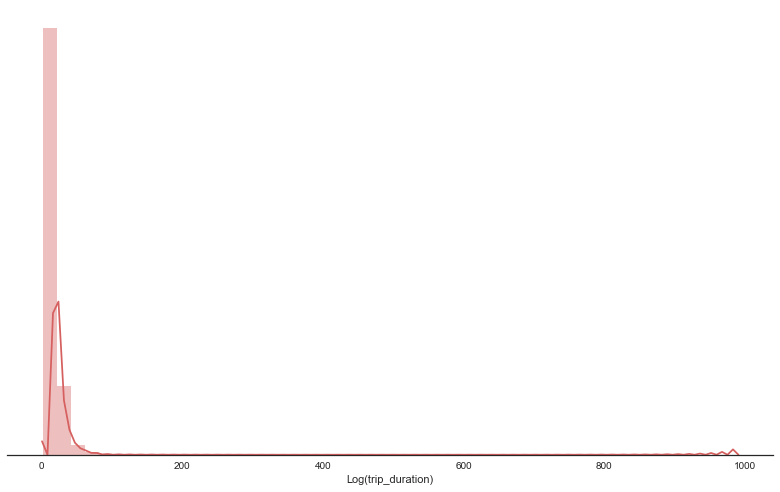

In [29]:
%matplotlib inline
start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(data['travel_time'], axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
plt.show()

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Time taken by above cell is 0.13972711563110352.


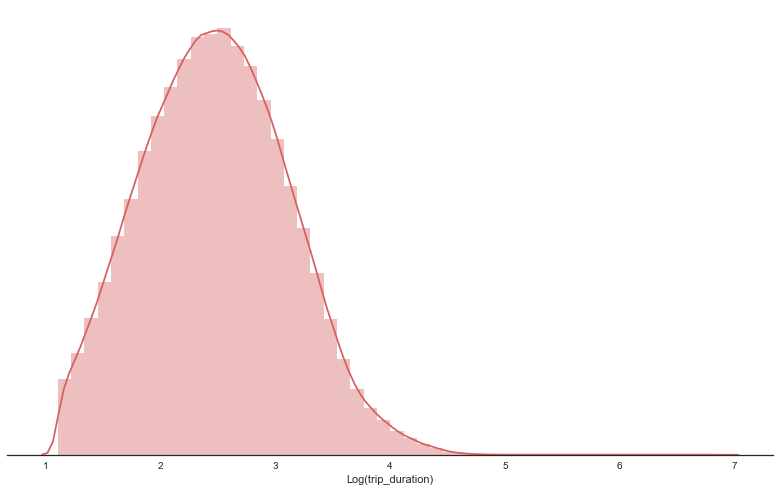

In [30]:
%matplotlib inline
start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(data['travel_time'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
plt.show()

### Histogram of distance

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Time taken by above cell is 0.15399813652038574.


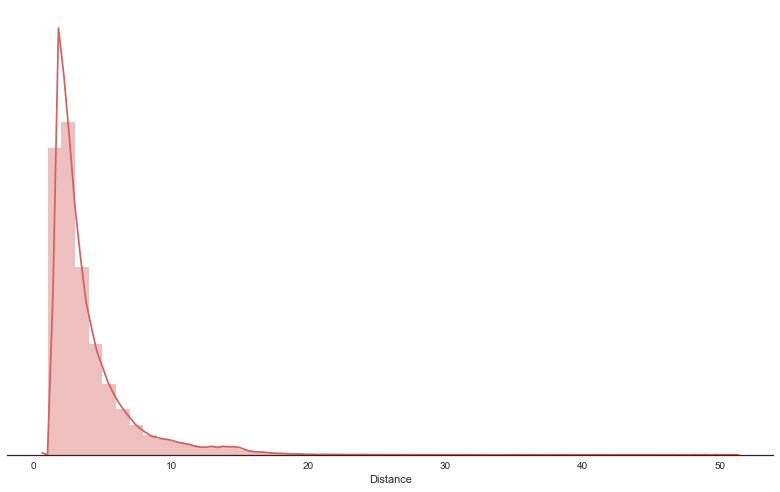

In [31]:
%matplotlib inline
start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(data['distance_in_km'].values+1, axlabel = 'Distance', label = 'Histogrqm of Distance', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
plt.show()

### Hourly Durations in Day of Week

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



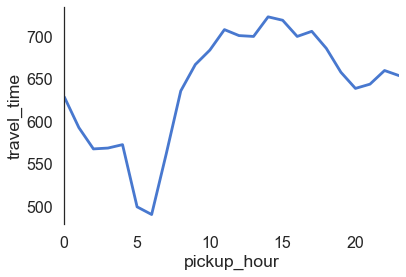

In [345]:
summary_hour_duration = pd.DataFrame(data.groupby('pickup_hour')['travel_time'].median())
summary_hour_duration.reset_index(inplace = True)
summary_hour_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=False)
sns.set_context("poster")
sns.tsplot(data=summary_hour_duration, time="pickup_hour", unit = "unit", value="travel_time")
sns.despine(bottom = True)

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



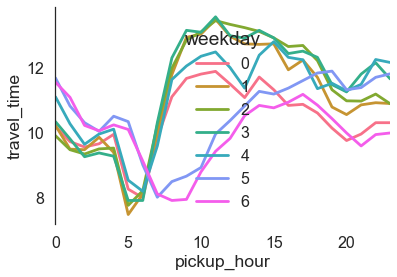

In [33]:
summary_hour_duration = pd.DataFrame(data.groupby(['weekday','pickup_hour'])['travel_time'].median())
summary_hour_duration.reset_index(inplace = True)
summary_hour_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=False)
sns.set_context("poster")
sns.tsplot(data=summary_hour_duration, time="pickup_hour", unit = "unit", condition="weekday", value="travel_time")
sns.despine(bottom = True)

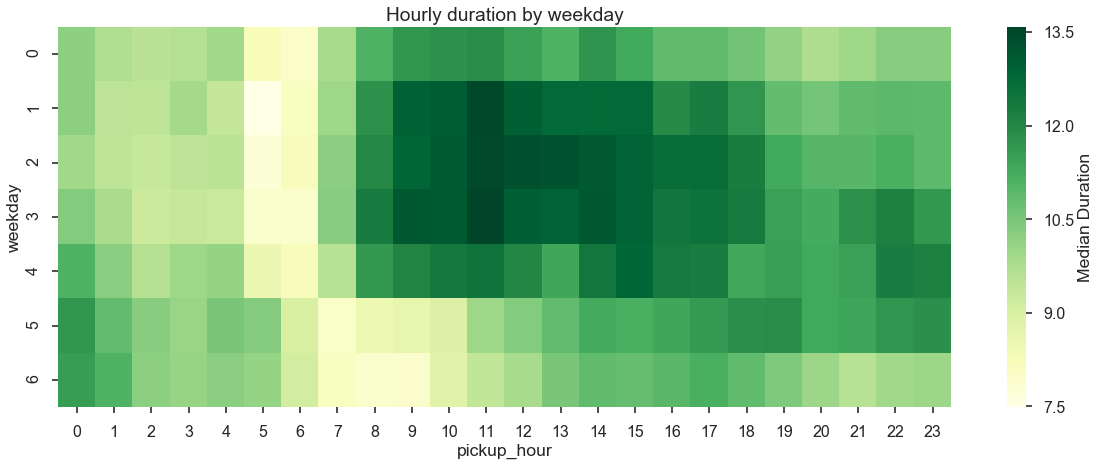

In [340]:
heatmap_data1 = summary_hour_duration.pivot(index = 'weekday',columns = 'pickup_hour',values = 'travel_time')
fig,ax=plt.subplots(figsize = (20,7))
plt.title('Hourly duration by weekday')
sns.heatmap(heatmap_data1, cbar_kws={'label': 'Median Duration'}, cmap="YlGn")

In [ ]:
sns.heatmap()

988.85
Time taken by above cell is 0.39388513565063477.


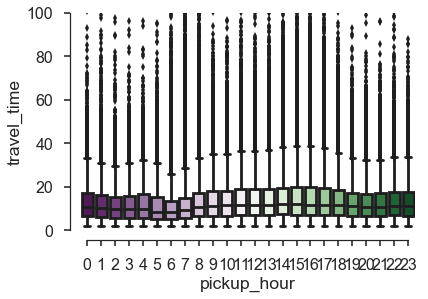

In [35]:
start = time.time()
sns.set(style="ticks")
sns.set_context("poster")
sns.boxplot(x="pickup_hour", y="travel_time", data=data, palette="PRGn")
plt.ylim(0, 100)
sns.despine(offset=10, trim=True)
print(data.travel_time.max())
end = time.time()
print("Time taken by above cell is {}.".format(end-start))

### Weekly Durations

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



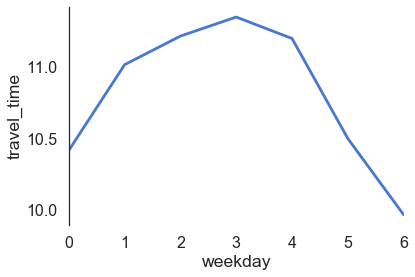

In [36]:
summary_week_duration = pd.DataFrame(data.groupby(['weekday'])['travel_time'].median())
summary_week_duration.reset_index(inplace = True)
summary_week_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=False)
sns.set_context("poster")
sns.tsplot(data=summary_week_duration, time="weekday", unit = "unit", value="travel_time")
sns.despine(bottom = True)

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



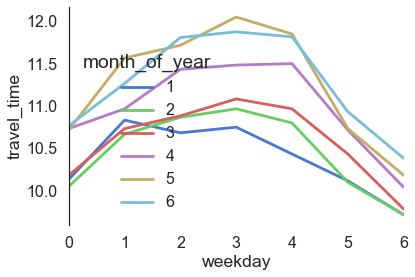

In [37]:
summary_weekday_duration = pd.DataFrame(data.groupby(['weekday','month_of_year'])['travel_time'].median())
summary_weekday_duration.reset_index(inplace = True)
summary_weekday_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=False)
sns.set_context("poster")
sns.tsplot(data=summary_weekday_duration, time="weekday", unit = "unit", condition="month_of_year", value="travel_time")
sns.despine(bottom = True)

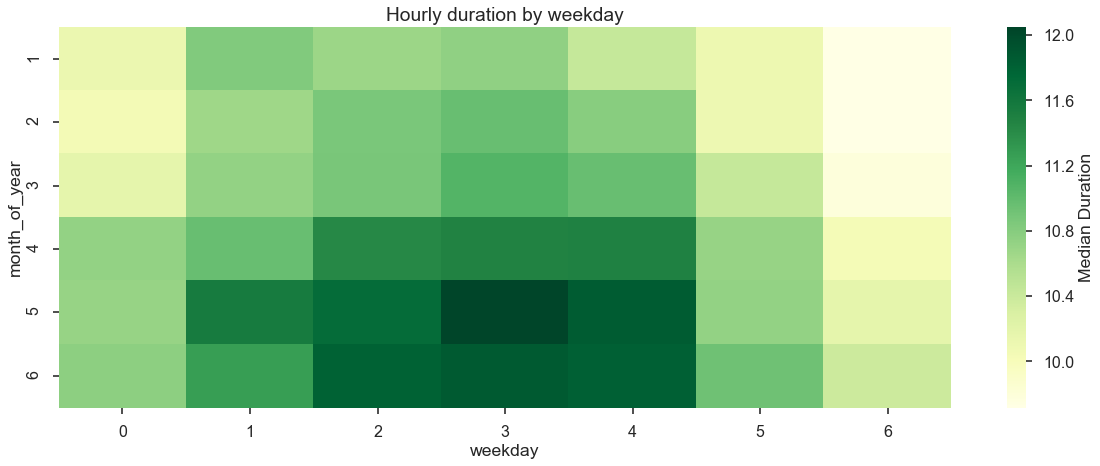

In [339]:
heatmap_data2 = summary_weekday_duration.pivot(index = 'month_of_year',columns = 'weekday',values = 'travel_time')
fig,ax=plt.subplots(figsize = (20,7))
plt.title('Hourly duration by weekday')
ax.axis
sns.heatmap(heatmap_data, cbar_kws={'label': 'Median Duration'}, cmap="YlGn")

988.85
Time taken by above cell is 0.1332399845123291.


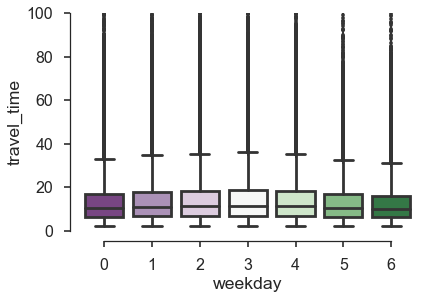

In [39]:
start = time.time()
sns.set(style="ticks")
sns.set_context("poster")
sns.boxplot(x="weekday", y="travel_time", data=data, palette="PRGn")
plt.ylim(0, 100)
sns.despine(offset=10, trim=True)
print(data.travel_time.max())
end = time.time()
print("Time taken by above cell is {}.".format(end-start))

## Monthly Durations

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.

/Users/franceszhang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



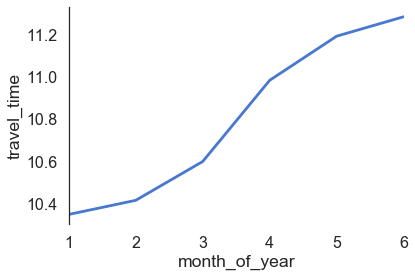

In [40]:
summary_month_duration = pd.DataFrame(data.groupby(['month_of_year'])['travel_time'].median())
summary_month_duration.reset_index(inplace = True)
summary_month_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=False)
sns.set_context("poster")
sns.tsplot(data=summary_month_duration, time="month_of_year", unit = "unit", value="travel_time")
sns.despine(bottom = True)

988.85
Time taken by above cell is 0.09720587730407715.


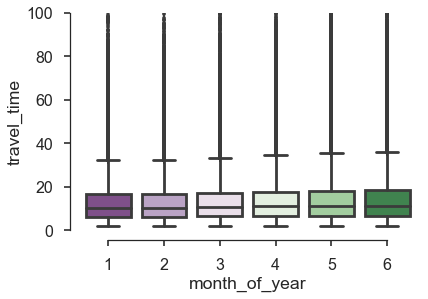

In [41]:
start = time.time()
sns.set(style="ticks")
sns.set_context("poster")
sns.boxplot(x="month_of_year", y="travel_time", data=data, palette="PRGn")
plt.ylim(0, 100)
sns.despine(offset=10, trim=True)
print(data.travel_time.max())
end = time.time()
print("Time taken by above cell is {}.".format(end-start))

### Passenger count

988.85
Time taken by above cell is 0.15037083625793457.


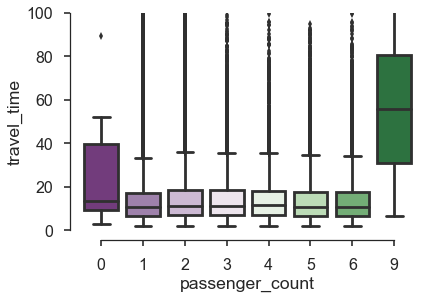

In [42]:
start = time.time()
sns.set(style="ticks")
sns.set_context("poster")
sns.boxplot(x="passenger_count", y="travel_time", data=data, palette="PRGn")
plt.ylim(0, 100)
sns.despine(offset=10, trim=True)
print(data.travel_time.max())
end = time.time()
print("Time taken by above cell is {}.".format(end-start))

In [43]:
def bearing_array(lat1, lng1, lat2, lng2):
    
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

def haversine_(lat1, lng1, lat2, lng2):
    """function to calculate haversine distance between two co-ordinates"""
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return(h)

def manhattan_distance_pd(lat1, lng1, lat2, lng2):
    """function to calculate manhatten distance between pick_drop"""
    a = haversine_(lat1, lng1, lat1, lng2)
    b = haversine_(lat1, lng1, lat2, lng1)
    return a + b
data['mahattan_distance'] = manhattan_distance_pd(data.pickup_latitude,data.pickup_longitude,data.dropoff_latitude,data.dropoff_longitude)
data['bearing'] = bearing_array(data.pickup_latitude,data.pickup_longitude,data.dropoff_latitude,data.dropoff_longitude)

### Cluster

#### K-Means Cluster

In [45]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

#### Remove outliers of longitude and latitude

In [46]:
xlim = [-74.03, -73.77]
ylim = [40.63, 40.85]
data = data[(data.pickup_longitude> xlim[0]) & (data.pickup_longitude < xlim[1])]
data = data[(data.dropoff_longitude> xlim[0]) & (data.dropoff_longitude < xlim[1])]
data = data[(data.pickup_latitude> ylim[0]) & (data.pickup_latitude < ylim[1])]
data = data[(data.dropoff_latitude> ylim[0]) & (data.dropoff_latitude < ylim[1])]

#### Cluster only location
##### 100 clusters

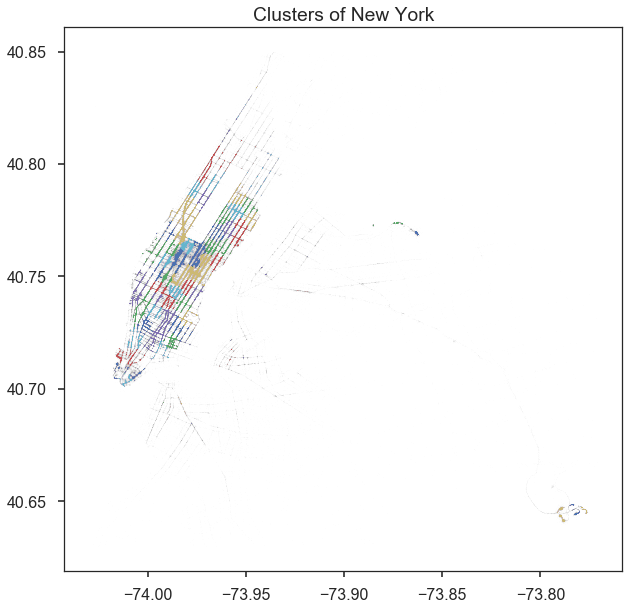

In [48]:
loc_df = pd.DataFrame()
loc_df['longitude'] = data.pickup_longitude
loc_df['latitude'] = data.pickup_latitude

kmeans = KMeans(n_clusters=100, random_state=2, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_


plt.figure(figsize = (10,10))
for label in loc_df.label.unique():
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 0.3, markersize = 0.3)

plt.title('Clusters of New York')
plt.show()

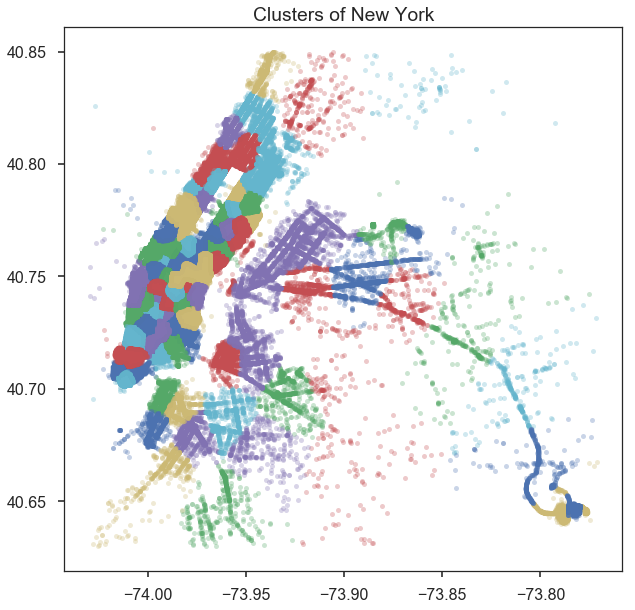

In [49]:
plt.figure(figsize = (10,10))
for label in loc_df.label.unique():
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 0.3, markersize = 10)

plt.title('Clusters of New York')
plt.show()

##### 20 clusters

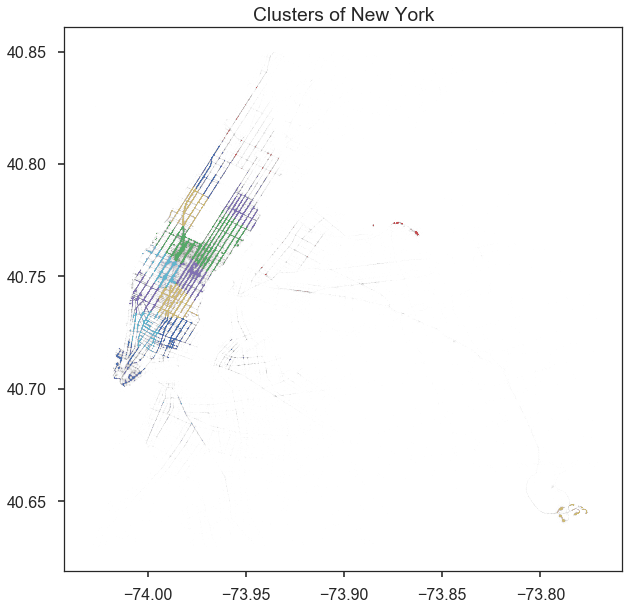

In [50]:
loc_df1 = pd.DataFrame()
loc_df1['longitude'] = data.pickup_longitude
loc_df1['latitude'] = data.pickup_latitude
kmeans1 = KMeans(n_clusters=20, random_state=2, n_init = 10).fit(loc_df1)
loc_df1['label'] = kmeans1.labels_


plt.figure(figsize = (10,10))
for label in loc_df1.label.unique():
    plt.plot(loc_df1.longitude[loc_df1.label == label],loc_df1.latitude[loc_df1.label == label],'.', alpha = 0.3, markersize = 0.3)

plt.title('Clusters of New York')
plt.show()

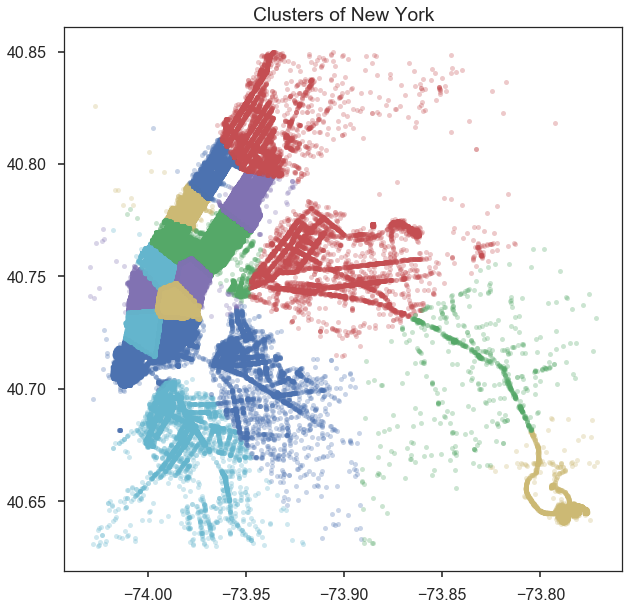

In [51]:
plt.figure(figsize = (10,10))
for label in loc_df1.label.unique():
    plt.plot(loc_df1.longitude[loc_df1.label == label],loc_df1.latitude[loc_df1.label == label],'.', alpha = 0.3, markersize = 10)

plt.title('Clusters of New York')
plt.show()

#### Cluster both pickup and dropoff location and pickup time
##### 100 clusters

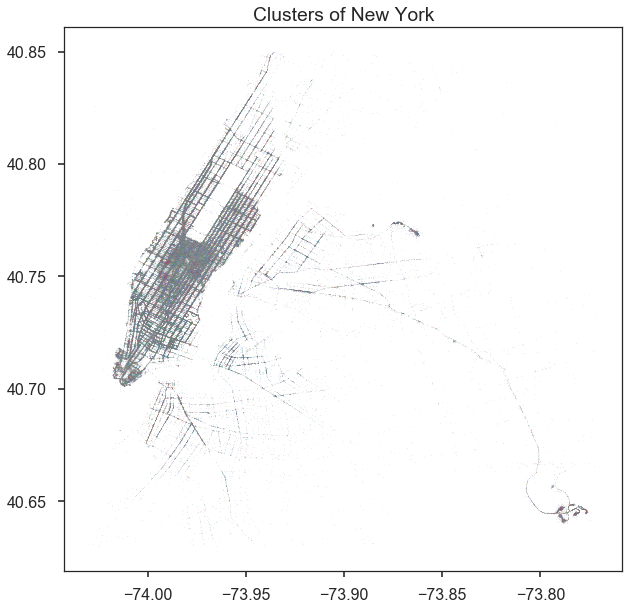

In [52]:
loc_df2 = pd.DataFrame()
loc_df2['longitude'] = data.pickup_longitude
loc_df2['latitude'] = data.pickup_latitude
loc_df2['hour'] = data.pickup_hour
loc_df2['month'] = data.month_of_year
loc_df2['weekday'] = data.weekday
loc_df2["dropoff_lat"] = data.dropoff_latitude
loc_df2['dropoff_long'] = data.dropoff_longitude

kmeans2 = KMeans(n_clusters=100, random_state=2, n_init = 10).fit(loc_df2)
loc_df2['label'] = kmeans2.labels_


plt.figure(figsize = (10,10))
for label in loc_df2.label.unique():
    plt.plot(loc_df2.longitude[loc_df2.label == label],loc_df2.latitude[loc_df2.label == label],'.', alpha = 0.3, markersize = 1)

plt.title('Clusters of New York')
plt.show()

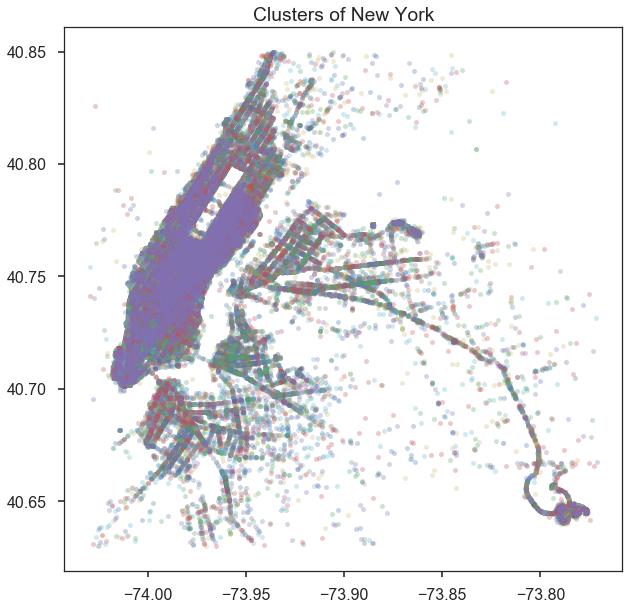

In [53]:
plt.figure(figsize = (10,10))
for label in loc_df2.label.unique():
    plt.plot(loc_df2.longitude[loc_df2.label == label],loc_df1.latitude[loc_df2.label == label],'.', alpha = 0.3, markersize = 10)

plt.title('Clusters of New York')
plt.show()

##### 20 clusters

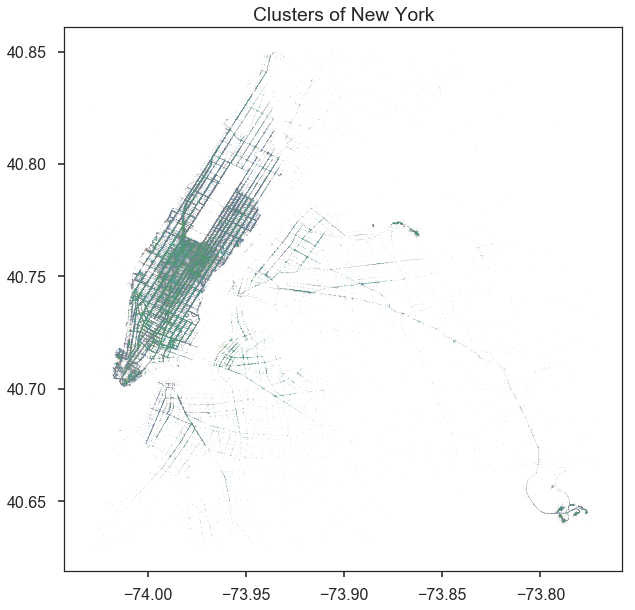

In [54]:
loc_df3 = pd.DataFrame()
loc_df3['longitude'] = data.pickup_longitude
loc_df3['latitude'] = data.pickup_latitude
loc_df3['hour'] = data.pickup_hour
loc_df3['month'] = data.month_of_year
loc_df3['weekday'] = data.weekday
loc_df3["dropoff_lat"] = data.dropoff_latitude
loc_df3['dropoff_long'] = data.dropoff_longitude

kmeans3 = KMeans(n_clusters=20, random_state=2, n_init = 10).fit(loc_df3)
loc_df3['label'] = kmeans3.labels_


plt.figure(figsize = (10,10))
for label in loc_df3.label.unique():
    plt.plot(loc_df3.longitude[loc_df3.label == label],loc_df3.latitude[loc_df3.label == label],'.', alpha = 0.3, markersize = 1)

plt.title('Clusters of New York')
plt.show()

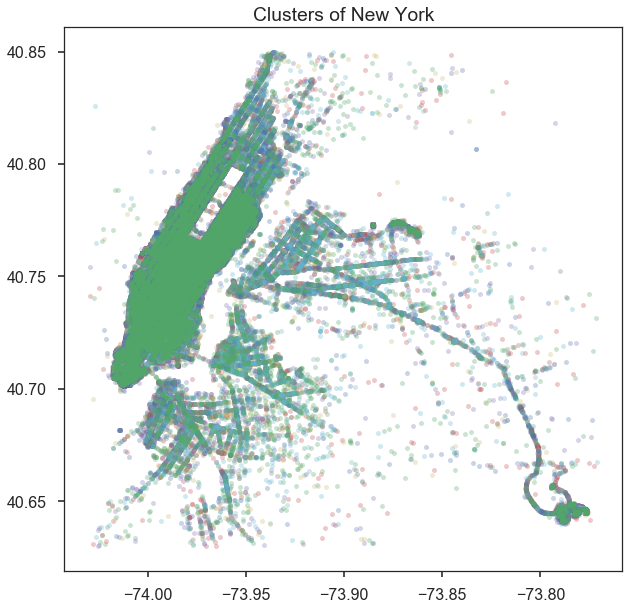

In [55]:
plt.figure(figsize = (10,10))
for label in loc_df3.label.unique():
    plt.plot(loc_df3.longitude[loc_df3.label == label],loc_df3.latitude[loc_df3.label == label],'.', alpha = 0.3, markersize = 10)

plt.title('Clusters of New York')
plt.show()

#### Cluster pickup and dropoff locations

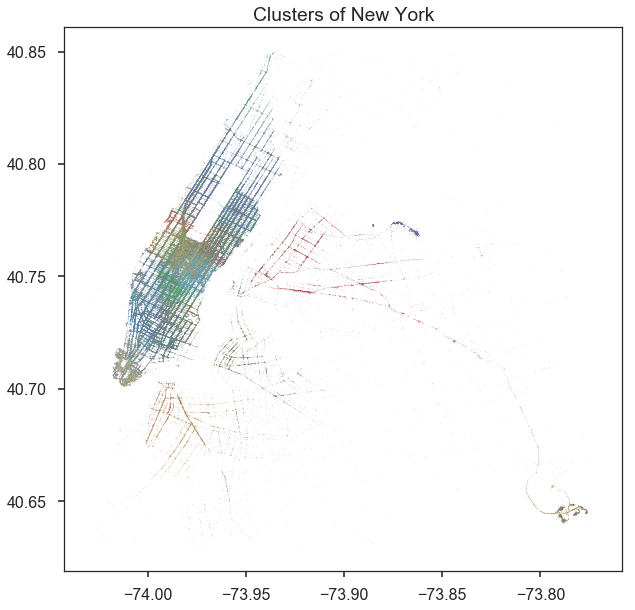

In [56]:
loc_df4 = pd.DataFrame()
loc_df4['longitude'] = data.pickup_longitude
loc_df4['latitude'] = data.pickup_latitude
loc_df4["dropoff_lat"] = data.dropoff_latitude
loc_df4['dropoff_long'] = data.dropoff_longitude

kmeans4 = KMeans(n_clusters=100, random_state=2, n_init = 10).fit(loc_df4)
loc_df4['label'] = kmeans4.labels_


plt.figure(figsize = (10,10))
for label in loc_df4.label.unique():
    plt.plot(loc_df4.longitude[loc_df4.label == label],loc_df4.latitude[loc_df4.label == label],'.', alpha = 0.3, markersize = 1)

plt.title('Clusters of New York')
plt.show()

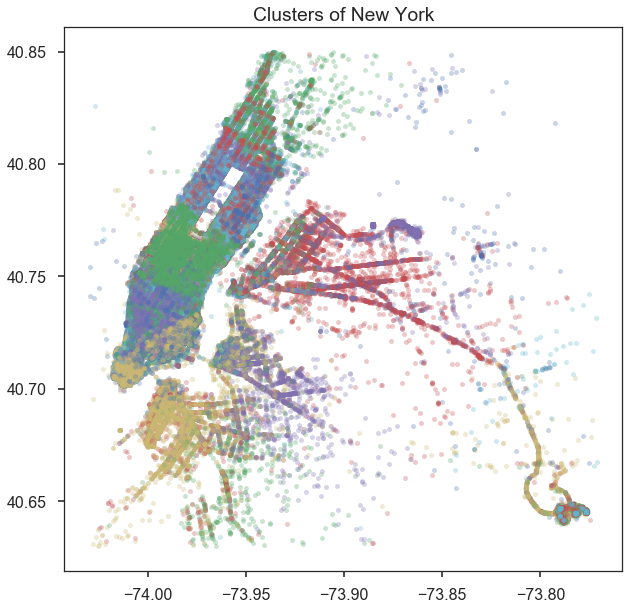

In [57]:
plt.figure(figsize = (10,10))
for label in loc_df4.label.unique():
    plt.plot(loc_df4.longitude[loc_df4.label == label],loc_df4.latitude[loc_df4.label == label],'.', alpha = 0.3, markersize = 10)

plt.title('Clusters of New York')
plt.show()

In [274]:
#df6 = df5.copy()
data = df6

date_of_year  month_of_year  day_of_year  pickup_hour    dropoff_datetime  \
2   2016-01-24              1           24           14 2016-01-24 15:10:29   
3   2016-01-24              1           24           14 2016-01-24 14:27:57   
4   2016-01-24              1           24           14 2016-01-24 14:07:56   
5   2016-01-24              1           24           14 2016-01-24 14:39:18   
6   2016-01-24              1           24           14 2016-01-24 15:21:03   

      pickup_datetime  pickup_longitude  pickup_latitude  dropoff_longitude  \
2 2016-01-24 14:58:52        -74.014694        40.709827         -74.004402   
3 2016-01-24 14:25:46        -73.967033        40.760910         -73.960648   
4 2016-01-24 14:01:36        -73.922768        40.743809         -73.922295   
5 2016-01-24 14:28:12        -73.997551        40.741390         -73.990852   
6 2016-01-24 14:51:55        -73.776794        40.645077         -73.988022   

   dropoff_latitude  travel_time  passenger_count       temp  visib  mxpsd  \
2         40.733479    11.616667                1  26.700001    7.4   17.1   
3         40.766449     2.183333                1  26.700001    7.4   17.1   
4         40.754883     6.333333                6  26.700001    7.4   17.1   
5         40.734859    11.100000                5  26.700001    7.4   17.1   
6         40.747063    29.133333                2  26.700001    7.4   17.1   

   wdsp  gust        max   min  prcp  sndp  fog  rain_drizzle  \
2   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
3   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
4   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
5   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
6   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   

   snow_ice_pellets  hail  thunder  distance_in_km  weekday  \
2                 1     0        0        2.584325        6   
3                 1     0        0        0.556410        6   
4                 1     0        0        1.231660        6   
5                 1     0        0        0.658903        6   
6                 1     0        0       12.493533        6   

   mahattan_distance     bearing  pick_drop_loc_date_20  \
2           3.497675   18.248392                     19   
3           1.153811   41.116138                     19   
4           1.270824    1.853924                     19   
5           1.290564  142.140533                     19   
6          29.161753  -57.441730                     19   

   pick_drop_loc_date_100  pickup_loc_100  pick_drop_loc_100  pickup_loc_20  
2                      40              76                 26              5  
3                      40              89                  4              2  
4                      40              25                 68             12  
5                      40              71                 71              0  
6                      40               1                 78              6

In [253]:
data['pick_drop_loc_date_20'] = loc_df3.label#add labels by your perference
data['pick_drop_loc_date_100'] = loc_df2.label
data['pickup_loc_100'] = loc_df.label
data['pick_drop_loc_100'] = loc_df4.label
data['pickup_loc_20'] = loc_df1.label

In [275]:
df_month = pd.get_dummies(data['month_of_year'])
df_month.columns = ['m_' + str(col) for col in df_month.columns]

df_hour = pd.get_dummies(data['pickup_hour'])
df_hour.columns = ['h_' + str(col) for col in df_hour.columns]

df_day = pd.get_dummies(data['day_of_year'])
df_day.columns = ['d_' + str(col) for col in df_day.columns]

# 0 for Monday
df_week = pd.get_dummies(data['weekday'])
df_week.columns = ['w_' + str(col) for col in df_week.columns]

data = pd.concat([data, df_month, df_week, df_day, df_hour], axis=1)
data.head()

date_of_year  month_of_year  day_of_year  pickup_hour    dropoff_datetime  \
2   2016-01-24              1           24           14 2016-01-24 15:10:29   
3   2016-01-24              1           24           14 2016-01-24 14:27:57   
4   2016-01-24              1           24           14 2016-01-24 14:07:56   
5   2016-01-24              1           24           14 2016-01-24 14:39:18   
6   2016-01-24              1           24           14 2016-01-24 15:21:03   

      pickup_datetime  pickup_longitude  pickup_latitude  dropoff_longitude  \
2 2016-01-24 14:58:52        -74.014694        40.709827         -74.004402   
3 2016-01-24 14:25:46        -73.967033        40.760910         -73.960648   
4 2016-01-24 14:01:36        -73.922768        40.743809         -73.922295   
5 2016-01-24 14:28:12        -73.997551        40.741390         -73.990852   
6 2016-01-24 14:51:55        -73.776794        40.645077         -73.988022   

   dropoff_latitude  travel_time  passenger_count       temp  visib  mxpsd  \
2         40.733479    11.616667                1  26.700001    7.4   17.1   
3         40.766449     2.183333                1  26.700001    7.4   17.1   
4         40.754883     6.333333                6  26.700001    7.4   17.1   
5         40.734859    11.100000                5  26.700001    7.4   17.1   
6         40.747063    29.133333                2  26.700001    7.4   17.1   

   wdsp  gust        max   min  prcp  sndp  fog  rain_drizzle  \
2   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
3   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
4   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
5   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
6   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   

   snow_ice_pellets  hail  thunder  distance_in_km  weekday  \
2                 1     0        0        2.584325        6   
3                 1     0        0        0.556410        6   
4                 1     0        0        1.231660        6   
5                 1     0        0        0.658903        6   
6                 1     0        0       12.493533        6   

   mahattan_distance     bearing  pick_drop_loc_date_20  \
2           3.497675   18.248392                     19   
3           1.153811   41.116138                     19   
4           1.270824    1.853924                     19   
5           1.290564  142.140533                     19   
6          29.161753  -57.441730                     19   

   pick_drop_loc_date_100  pickup_loc_100  pick_drop_loc_100  pickup_loc_20  \
2                      40              76                 26              5   
3                      40              89                  4              2   
4                      40              25                 68             12   
5                      40              71                 71              0   
6                      40               1                 78              6   

   m_1  m_2  m_3  m_4  m_5  m_6  w_0  w_1  w_2  w_3  w_4  w_5  w_6  d_1  d_2  \
2    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
3    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
4    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
5    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
6    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   

   d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  d_13  d_14  d_15  \
2    0    0    0    0    0    0    0     0     0     0     0     0     0   
3    0    0    0    0    0    0    0     0     0     0     0     0     0   
4    0    0    0    0    0    0    0     0     0     0     0     0     0   
5    0    0    0    0    0    0    0     0     0     0     0     0     0   
6    0    0    0    0    0    0    0     0     0     0     0     0     0   

   d_16  d_17  d_18  d_19  d_20  d_21  d_22  

##### Geohash

In [255]:
from __future__ import print_function, division
import geopandas as gpd
import shapely
import pysal as ps
from fiona.crs import from_epsg
from shapely.geometry import Polygon
import geopandas as gpd
import geohash_hilbert as ghh
import choroplethNYC as cp
#!pip install geohash_hilbert 
#!pip install geopandas 
#!pip install pysal
#!pip install shapely


In [276]:
df1 = data.copy()
geo = []
for i in range(len(data)):
    value = ghh.encode(df1.pickup_longitude.iloc[i], df1.pickup_latitude.iloc[i], precision=5)
    geo.append(value)
df1['pickup_geohash'] = geo
df1['pickups'] = np.ones(df1.shape[0])
df1.head()

date_of_year  month_of_year  day_of_year  pickup_hour    dropoff_datetime  \
2   2016-01-24              1           24           14 2016-01-24 15:10:29   
3   2016-01-24              1           24           14 2016-01-24 14:27:57   
4   2016-01-24              1           24           14 2016-01-24 14:07:56   
5   2016-01-24              1           24           14 2016-01-24 14:39:18   
6   2016-01-24              1           24           14 2016-01-24 15:21:03   

      pickup_datetime  pickup_longitude  pickup_latitude  dropoff_longitude  \
2 2016-01-24 14:58:52        -74.014694        40.709827         -74.004402   
3 2016-01-24 14:25:46        -73.967033        40.760910         -73.960648   
4 2016-01-24 14:01:36        -73.922768        40.743809         -73.922295   
5 2016-01-24 14:28:12        -73.997551        40.741390         -73.990852   
6 2016-01-24 14:51:55        -73.776794        40.645077         -73.988022   

   dropoff_latitude  travel_time  passenger_count       temp  visib  mxpsd  \
2         40.733479    11.616667                1  26.700001    7.4   17.1   
3         40.766449     2.183333                1  26.700001    7.4   17.1   
4         40.754883     6.333333                6  26.700001    7.4   17.1   
5         40.734859    11.100000                5  26.700001    7.4   17.1   
6         40.747063    29.133333                2  26.700001    7.4   17.1   

   wdsp  gust        max   min  prcp  sndp  fog  rain_drizzle  \
2   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
3   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
4   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
5   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
6   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   

   snow_ice_pellets  hail  thunder  distance_in_km  weekday  \
2                 1     0        0        2.584325        6   
3                 1     0        0        0.556410        6   
4                 1     0        0        1.231660        6   
5                 1     0        0        0.658903        6   
6                 1     0        0       12.493533        6   

   mahattan_distance     bearing  pick_drop_loc_date_20  \
2           3.497675   18.248392                     19   
3           1.153811   41.116138                     19   
4           1.270824    1.853924                     19   
5           1.290564  142.140533                     19   
6          29.161753  -57.441730                     19   

   pick_drop_loc_date_100  pickup_loc_100  pick_drop_loc_100  pickup_loc_20  \
2                      40              76                 26              5   
3                      40              89                  4              2   
4                      40              25                 68             12   
5                      40              71                 71              0   
6                      40               1                 78              6   

   m_1  m_2  m_3  m_4  m_5  m_6  w_0  w_1  w_2  w_3  w_4  w_5  w_6  d_1  d_2  \
2    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
3    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
4    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
5    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
6    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   

   d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  d_13  d_14  d_15  \
2    0    0    0    0    0    0    0     0     0     0     0     0     0   
3    0    0    0    0    0    0    0     0     0     0     0     0     0   
4    0    0    0    0    0    0    0     0     0     0     0     0     0   
5    0    0    0    0    0    0    0     0     0     0     0     0     0   
6    0    0    0    0    0    0    0     0     0     0     0     0     0   

   d_16  d_17  d_18  d_19  d_20  d_21  d_22  

In [284]:
geo = []
for i in range(len(data)):
    value = ghh.encode(df1.dropoff_longitude.iloc[i], df1.dropoff_latitude.iloc[i], precision=5)
    geo.append(value)
df1['dropoff_geohash'] = geo
df1['pickups'] = np.ones(df1.shape[0])
df1.head()

date_of_year  month_of_year  day_of_year  pickup_hour    dropoff_datetime  \
2   2016-01-24              1           24           14 2016-01-24 15:10:29   
3   2016-01-24              1           24           14 2016-01-24 14:27:57   
4   2016-01-24              1           24           14 2016-01-24 14:07:56   
5   2016-01-24              1           24           14 2016-01-24 14:39:18   
6   2016-01-24              1           24           14 2016-01-24 15:21:03   

      pickup_datetime  pickup_longitude  pickup_latitude  dropoff_longitude  \
2 2016-01-24 14:58:52        -74.014694        40.709827         -74.004402   
3 2016-01-24 14:25:46        -73.967033        40.760910         -73.960648   
4 2016-01-24 14:01:36        -73.922768        40.743809         -73.922295   
5 2016-01-24 14:28:12        -73.997551        40.741390         -73.990852   
6 2016-01-24 14:51:55        -73.776794        40.645077         -73.988022   

   dropoff_latitude  travel_time  passenger_count       temp  visib  mxpsd  \
2         40.733479    11.616667                1  26.700001    7.4   17.1   
3         40.766449     2.183333                1  26.700001    7.4   17.1   
4         40.754883     6.333333                6  26.700001    7.4   17.1   
5         40.734859    11.100000                5  26.700001    7.4   17.1   
6         40.747063    29.133333                2  26.700001    7.4   17.1   

   wdsp  gust        max   min  prcp  sndp  fog  rain_drizzle  \
2   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
3   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
4   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
5   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   
6   6.3  26.0  35.099998  19.9  1.82   5.9    1             0   

   snow_ice_pellets  hail  thunder  distance_in_km  weekday  \
2                 1     0        0        2.584325        6   
3                 1     0        0        0.556410        6   
4                 1     0        0        1.231660        6   
5                 1     0        0        0.658903        6   
6                 1     0        0       12.493533        6   

   mahattan_distance     bearing  pick_drop_loc_date_20  \
2           3.497675   18.248392                     19   
3           1.153811   41.116138                     19   
4           1.270824    1.853924                     19   
5           1.290564  142.140533                     19   
6          29.161753  -57.441730                     19   

   pick_drop_loc_date_100  pickup_loc_100  pick_drop_loc_100  pickup_loc_20  \
2                      40              76                 26              5   
3                      40              89                  4              2   
4                      40              25                 68             12   
5                      40              71                 71              0   
6                      40               1                 78              6   

   m_1  m_2  m_3  m_4  m_5  m_6  w_0  w_1  w_2  w_3  w_4  w_5  w_6  d_1  d_2  \
2    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
3    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
4    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
5    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
6    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0   

   d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  d_13  d_14  d_15  \
2    0    0    0    0    0    0    0     0     0     0     0     0     0   
3    0    0    0    0    0    0    0     0     0     0     0     0     0   
4    0    0    0    0    0    0    0     0     0     0     0     0     0   
5    0    0    0    0    0    0    0     0     0     0     0     0     0   
6    0    0    0    0    0    0    0     0     0     0     0     0     0   

   d_16  d_17  d_18  d_19  d_20  d_21  d_22  

In [285]:
data["pickup_geohash"] = df1['pickup_geohash']
data['dropoff_geohash'] = df1['dropoff_geohash']

In [286]:
df2 = df1[['pickups','pickup_geohash']]
df2 = df2.groupby('pickup_geohash', as_index=False).agg({'pickups':'sum'})
df2.head()

pickup_geohash  pickups
0          SHBHv      1.0
1          SHBIx      2.0
2          SHBIz      3.0
3          SHBJ2      1.0
4          SHBJ3    515.0

In [287]:
df2.reset_index(drop=True, inplace=True)
geohashlist = list(df2.pickup_geohash.unique())

In [288]:
#add a column of geometry to dataframe
geo = []
for i in range(len(geohashlist)):
    coords = ghh.rectangle(geohashlist[i])['geometry']['coordinates'][0]
    geo.append(Polygon(coords))
geo = pd.DataFrame({"geometry":geo})
df2 = df2.merge(geo,left_index=True, right_index=True)

In [289]:
df2 = gpd.GeoDataFrame(df2)
df2.crs = from_epsg(4326)
df2 = df2.to_crs(epsg=2263)

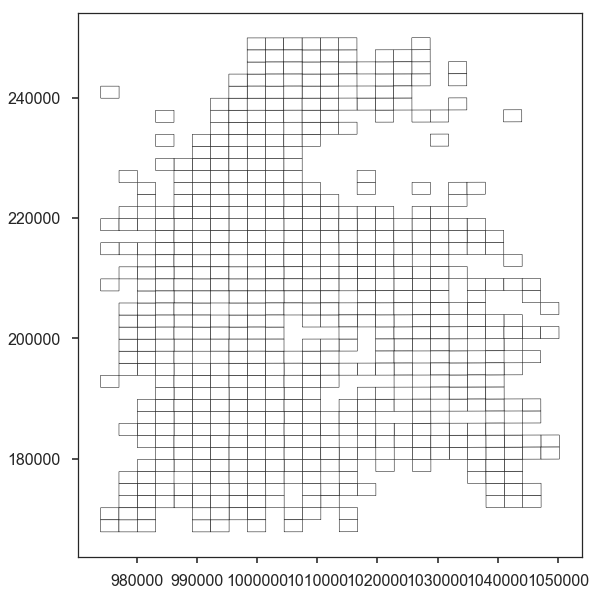

In [290]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
df2.plot(column=None, color="white", edgecolor="black", ax=ax)
plt.savefig('geohash_pickup', dpi=500, transparent=True)
plt.show()

In [291]:
#os.system("curl -O https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip")
#os.system("mv " + "taxi_zones.zip " + os.getenv("PUIDATA"))
#os.system("unzip " + os.getenv("PUIDATA") + "/taxi_zones.zip -d " + os.getenv("PUIDATA") + "/taxi_zones")
#zone = gpd.read_file(os.getenv("PUIDATA") + "/taxi_zones" + "/taxi_zones.shp")
zone = gpd.read_file("./taxi_zones/taxi_zones.shp")
zone.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.9183527103 192536.0856972019,...  
1         Queens  (POLYGON ((1033269.243591294 172126.0078125, 1...  
2          Bronx  POLYGON ((1026308.769506663 256767.6975403726,...  
3      Manhattan  POLYGON ((992073.4667968601 203714.0759887695,...  
4  Staten Island  POLYGON ((935843.3104932606 144283.335850656, ...

No handles with labels found to put in legend.


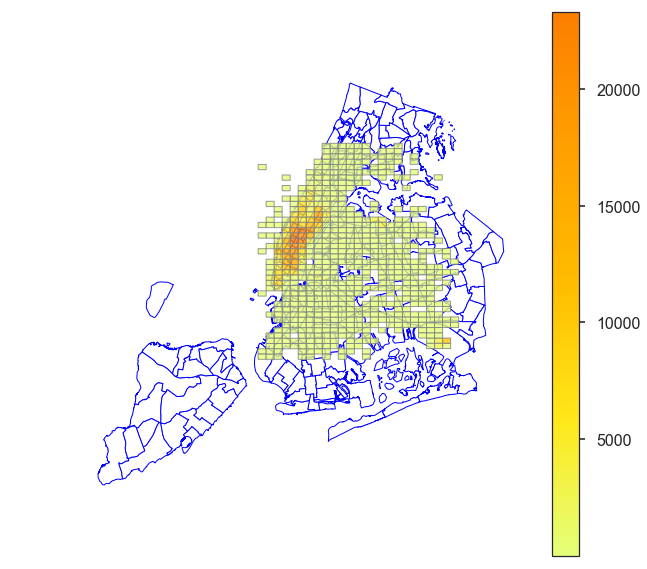

In [292]:
typ = 'fisher_jenks'
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
cp.choroplethNYC(zone, column=None, color="white", edgecolor="blue", lw=1, ax=ax)
df2.plot(column='pickups', cmap='Wistia',  alpha=0.8, edgecolor="grey", linewidth=1,
           ax=ax, legend=True, k=5)
plt.legend(loc=2)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.35, 0.95, 0, 0))
plt.savefig('geohash_pickup', dpi=500, transparent=True)
plt.show()

In [293]:
data["dropoff_geohash_recode"] = data["dropoff_geohash"].astype('category')
data.dtypes
data["dropoff_geohash_recode"] = data["dropoff_geohash_recode"].cat.codes
data.head()
df1['dropoff_geohash_recode'] = data.dropoff_geohash_recode

In [294]:
a = data[['dropoff_geohash','dropoff_geohash_recode']]
d = a.drop_duplicates()
data = pd.merge(data, d, how = 'left', left_on = 'pickup_geohash', right_on = 'dropoff_geohash')
data = data.drop(['dropoff_geohash_y','dropoff_geohash_x','pickup_geohash'],axis = 1)
data = data.rename(columns = {'dropoff_geohash_recode_x':'dropoff_geohash_recode',
                            'dropoff_geohash_recode_y':'pickup_geohash_recode'})

In [295]:
#data.to_csv("./traindata.csv",index = False)
data['travel_time'] = round(data['travel_time']*60,0)

In [296]:
data.to_csv("./data.csv",index = False)

## Split train and test set

In [365]:
from sklearn.model_selection import train_test_split
selected_features = ['month_of_year', 'day_of_year',
        'pickup_hour',  'pickup_geohash_recode','dropoff_geohash_recode',
        'passenger_count', 'prcp', 'sndp', 'fog', 'weekday', 'distance_in_km',
        'mahattan_distance','pick_drop_loc_100','bearing','pickup_longitude', 
                     'pickup_latitude', 'dropoff_longitude','dropoff_latitude']
x = data[selected_features]
y = np.log(data['travel_time'])
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train.head()

month_of_year  day_of_year  pickup_hour  pickup_geohash_recode  \
401666              1           21           21                  431.0   
405718              1           22            4                  430.0   
559880              3            6            1                  490.0   
131218              5            9            9                  429.0   
125565              5            7            6                   13.0   

        dropoff_geohash_recode  passenger_count  prcp  sndp  fog  weekday  \
401666                     437                1  0.00   0.0    0        3   
405718                     529                1  0.00   0.0    0        4   
559880                     503                1  0.00   0.0    0        6   
131218                     507                4  0.05   0.0    0        0   
125565                     416                5  0.30   0.0    0        5   

        distance_in_km  mahattan_distance  pick_drop_loc_100     bearing  \
401666        1.099812           1.381905                  1  166.119675   
405718        6.496640          11.712905                 33  145.676895   
559880        1.268637           1.969658                  0 -153.436813   
131218        6.627302           7.182705                 21  175.249237   
125565        0.326385           2.701904                 96  118.677032   

        pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  
401666        -73.978958        40.762222         -73.975708         40.752254  
405718        -73.989380        40.760399         -73.932991         40.697769  
559880        -73.983932        40.727119         -73.991722         40.715309  
131218        -73.998184        40.761093         -73.991646         40.701450  
125565        -73.979752        40.783661         -73.959007         40.775070

### XGB

In [299]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt

In [300]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [371]:
xgb_pars = {'min_child_weight': 10, 'eta': 0.1, 'colsample_bytree': 0.7, 
            'max_depth': 15, 'subsample': 0.7, 'alpha': 1, 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'rmse', 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 150, watchlist, early_stopping_rounds=2,
      maximize=False, verbose_eval=1)
print('Modeling RMSE %.5f' % model.best_score)

[0]	train-rmse:5.39367	valid-rmse:5.39633
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 2 rounds.
[1]	train-rmse:4.85758	valid-rmse:4.86008
[2]	train-rmse:4.37603	valid-rmse:4.37816
[3]	train-rmse:3.94217	valid-rmse:3.94412
[4]	train-rmse:3.55186	valid-rmse:3.55368
[5]	train-rmse:3.20072	valid-rmse:3.20232
[6]	train-rmse:2.88492	valid-rmse:2.88643
[7]	train-rmse:2.60151	valid-rmse:2.60291
[8]	train-rmse:2.34685	valid-rmse:2.34819
[9]	train-rmse:2.11777	valid-rmse:2.11906
[10]	train-rmse:1.91297	valid-rmse:1.91421
[11]	train-rmse:1.7288	valid-rmse:1.73
[12]	train-rmse:1.56291	valid-rmse:1.56412
[13]	train-rmse:1.41429	valid-rmse:1.4155
[14]	train-rmse:1.28172	valid-rmse:1.28301
[15]	train-rmse:1.16263	valid-rmse:1.16404
[16]	train-rmse:1.05627	valid-rmse:1.05778
[17]	train-rmse:0.961333	valid-rmse:0.963095
[18]	train-rmse:0.877034	valid-rmse:0.87901
[19]	train-rmse:0.801452	valid-rmse:0.803651
[20]	t

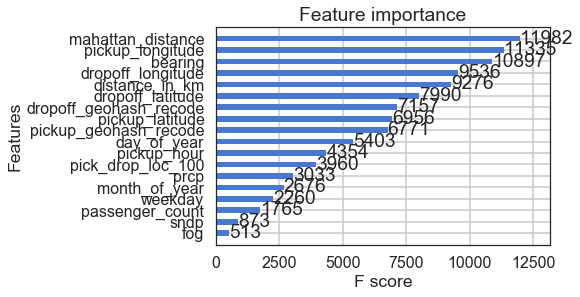

In [348]:
xgb.plot_importance(model, max_num_features=28, height=0.5)

In [372]:
from sklearn.metrics import mean_squared_error, r2_score
pred = model.predict(dvalid)
print("r2:", r2_score(pred, Y_test))
print("rmse:",sqrt(mean_squared_error(pred,Y_test)))
print("r2:", r2_score(model.predict(dtrain), Y_train))

r2: 0.7927217130932236
rmse: 0.28906705108481534
r2: 0.8812847641244155


###  Tune max_depth and min_child_weight

In [374]:
from sklearn.grid_search import GridSearchCV 

parameters_for_testing = {
   'min_child_weight':[10,15],
   'max_depth':[10,13,15],
   'alpha':[1,1.5],
    'lambda':[0.5,1]
    
}

                    
xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=100, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.7, colsample_bytree=0.7, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, cv=3, n_jobs=8,iid=False, verbose=10,scoring='r2')
gsearch1.fit(X_train,Y_train)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] alpha=1, lambda=0.5, max_depth=10, min_child_weight=10 ..........
[CV] alpha=1, lambda=0.5, max_depth=10, min_child_weight=10 ..........
[CV] alpha=1, lambda=0.5, max_depth=10, min_child_weight=10 ..........
[CV] alpha=1, lambda=0.5, max_depth=10, min_child_weight=15 ..........
[CV] alpha=1, lambda=0.5, max_depth=10, min_child_weight=15 ..........
[CV] alpha=1, lambda=0.5, max_depth=10, min_child_weight=15 ..........
[CV]  alpha=1, lambda=0.5, max_depth=10, min_child_weight=10, score=0.816642 - 3.6min
[CV] alpha=1, lambda=0.5, max_depth=13, min_child_weight=10 ..........


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  3.6min


[CV]  alpha=1, lambda=0.5, max_depth=10, min_child_weight=15, score=0.816684 - 3.6min
[CV] alpha=1, lambda=0.5, max_depth=13, min_child_weight=10 ..........
[CV]  alpha=1, lambda=0.5, max_depth=10, min_child_weight=15, score=0.816216 - 3.6min
[CV]  alpha=1, lambda=0.5, max_depth=10, min_child_weight=15, score=0.817051 - 3.6min
[CV]  alpha=1, lambda=0.5, max_depth=10, min_child_weight=10, score=0.817101 - 3.6min
[CV] alpha=1, lambda=0.5, max_depth=13, min_child_weight=10 ..........
[CV]  alpha=1, lambda=0.5, max_depth=10, min_child_weight=10, score=0.817093 - 3.6min
[CV] alpha=1, lambda=0.5, max_depth=13, min_child_weight=15 ..........
[CV] alpha=1, lambda=0.5, max_depth=13, min_child_weight=15 ..........
[CV] alpha=1, lambda=0.5, max_depth=13, min_child_weight=15 ..........


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  3.6min


[CV]  alpha=1, lambda=0.5, max_depth=13, min_child_weight=15, score=0.821312 - 5.0min
[CV] alpha=1, lambda=0.5, max_depth=15, min_child_weight=10 ..........
[CV]  alpha=1, lambda=0.5, max_depth=13, min_child_weight=15, score=0.820666 - 5.0min
[CV] alpha=1, lambda=0.5, max_depth=15, min_child_weight=10 ..........
[CV]  alpha=1, lambda=0.5, max_depth=13, min_child_weight=15, score=0.821111 - 5.0min
[CV] alpha=1, lambda=0.5, max_depth=15, min_child_weight=10 ..........
[CV]  alpha=1, lambda=0.5, max_depth=13, min_child_weight=10, score=0.820425 - 5.1min
[CV] alpha=1, lambda=0.5, max_depth=15, min_child_weight=15 ..........
[CV]  alpha=1, lambda=0.5, max_depth=13, min_child_weight=10, score=0.821426 - 5.1min
[CV] alpha=1, lambda=0.5, max_depth=15, min_child_weight=15 ..........
[CV]  alpha=1, lambda=0.5, max_depth=13, min_child_weight=10, score=0.820834 - 5.1min
[CV] alpha=1, lambda=0.5, max_depth=15, min_child_weight=15 ..........
[CV]  alpha=1, lambda=0.5, max_depth=15, min_child_weight=

[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 15.2min


[CV]  alpha=1, lambda=0.5, max_depth=15, min_child_weight=15, score=0.821736 - 6.5min
[CV] alpha=1, lambda=1, max_depth=10, min_child_weight=10 ............
[CV]  alpha=1, lambda=0.5, max_depth=15, min_child_weight=10, score=0.822050 - 6.6min
[CV] alpha=1, lambda=1, max_depth=10, min_child_weight=10 ............
[CV]  alpha=1, lambda=0.5, max_depth=15, min_child_weight=15, score=0.821667 - 6.5min
[CV] alpha=1, lambda=1, max_depth=10, min_child_weight=15 ............
[CV]  alpha=1, lambda=0.5, max_depth=15, min_child_weight=10, score=0.821093 - 6.6min
[CV] alpha=1, lambda=1, max_depth=10, min_child_weight=15 ............
[CV]  alpha=1, lambda=0.5, max_depth=15, min_child_weight=10, score=0.821078 - 6.6min
[CV] alpha=1, lambda=1, max_depth=10, min_child_weight=15 ............
[CV]  alpha=1, lambda=1, max_depth=10, min_child_weight=10, score=0.817101 - 3.6min
[CV]  alpha=1, lambda=1, max_depth=10, min_child_weight=15, score=0.817051 - 3.6min
[CV] alpha=1, lambda=1, max_depth=13, min_child

[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 18.9min


[CV] alpha=1, lambda=1, max_depth=13, min_child_weight=10 ............
[CV] alpha=1, lambda=1, max_depth=13, min_child_weight=15 ............
[CV]  alpha=1, lambda=1, max_depth=10, min_child_weight=15, score=0.816216 - 3.6min
[CV] alpha=1, lambda=1, max_depth=13, min_child_weight=15 ............
[CV]  alpha=1, lambda=1, max_depth=10, min_child_weight=15, score=0.816684 - 3.6min
[CV] alpha=1, lambda=1, max_depth=13, min_child_weight=15 ............
[CV]  alpha=1, lambda=1, max_depth=13, min_child_weight=15, score=0.821312 - 4.4min
[CV]  alpha=1, lambda=1, max_depth=13, min_child_weight=10, score=0.821426 - 4.5min
[CV] alpha=1, lambda=1, max_depth=15, min_child_weight=10 ............
[CV] alpha=1, lambda=1, max_depth=15, min_child_weight=10 ............
[CV]  alpha=1, lambda=1, max_depth=13, min_child_weight=15, score=0.820666 - 4.5min
[CV] alpha=1, lambda=1, max_depth=15, min_child_weight=10 ............
[CV]  alpha=1, lambda=1, max_depth=13, min_child_weight=10, score=0.820834 - 4.5min

[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 23.4min


[CV]  alpha=1, lambda=1, max_depth=13, min_child_weight=10, score=0.820425 - 4.5min
[CV] alpha=1, lambda=1, max_depth=15, min_child_weight=15 ............
[CV]  alpha=1, lambda=1, max_depth=15, min_child_weight=15, score=0.821736 - 5.3min
[CV] alpha=1.5, lambda=0.5, max_depth=10, min_child_weight=10 ........
[CV]  alpha=1, lambda=1, max_depth=15, min_child_weight=10, score=0.822050 - 5.4min
[CV] alpha=1.5, lambda=0.5, max_depth=10, min_child_weight=10 ........
[CV]  alpha=1, lambda=1, max_depth=15, min_child_weight=15, score=0.822175 - 5.4min
[CV] alpha=1.5, lambda=0.5, max_depth=10, min_child_weight=10 ........
[CV]  alpha=1, lambda=1, max_depth=15, min_child_weight=10, score=0.821078 - 5.4min
[CV] alpha=1.5, lambda=0.5, max_depth=10, min_child_weight=15 ........
[CV]  alpha=1, lambda=1, max_depth=15, min_child_weight=10, score=0.821093 - 5.4min
[CV]  alpha=1, lambda=1, max_depth=15, min_child_weight=15, score=0.821667 - 5.4min
[CV] alpha=1.5, lambda=0.5, max_depth=10, min_child_weigh

[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 32.4min


[CV]  alpha=1.5, lambda=0.5, max_depth=10, min_child_weight=15, score=0.816216 - 3.6min
[CV] alpha=1.5, lambda=0.5, max_depth=13, min_child_weight=10 ........
[CV]  alpha=1.5, lambda=0.5, max_depth=10, min_child_weight=15, score=0.816684 - 3.6min
[CV] alpha=1.5, lambda=0.5, max_depth=13, min_child_weight=15 ........
[CV]  alpha=1.5, lambda=0.5, max_depth=10, min_child_weight=15, score=0.817051 - 3.6min
[CV] alpha=1.5, lambda=0.5, max_depth=13, min_child_weight=15 ........
[CV]  alpha=1.5, lambda=0.5, max_depth=10, min_child_weight=10, score=0.816642 - 3.6min
[CV] alpha=1.5, lambda=0.5, max_depth=13, min_child_weight=15 ........
[CV]  alpha=1.5, lambda=0.5, max_depth=13, min_child_weight=10, score=0.821426 - 4.3min
[CV] alpha=1.5, lambda=0.5, max_depth=15, min_child_weight=10 ........
[CV]  alpha=1.5, lambda=0.5, max_depth=13, min_child_weight=15, score=0.821312 - 4.3min
[CV] alpha=1.5, lambda=0.5, max_depth=15, min_child_weight=10 ........
[CV]  alpha=1.5, lambda=0.5, max_depth=13, min

[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 41.5min


[CV]  alpha=1.5, lambda=0.5, max_depth=15, min_child_weight=15, score=0.821667 - 4.8min
[CV] alpha=1.5, lambda=1, max_depth=10, min_child_weight=10 ..........
[CV] alpha=1.5, lambda=1, max_depth=10, min_child_weight=10 ..........
[CV]  alpha=1.5, lambda=0.5, max_depth=15, min_child_weight=10, score=0.822050 - 4.8min
[CV] alpha=1.5, lambda=1, max_depth=10, min_child_weight=15 ..........
[CV]  alpha=1.5, lambda=0.5, max_depth=15, min_child_weight=10, score=0.821093 - 4.8min
[CV] alpha=1.5, lambda=1, max_depth=10, min_child_weight=15 ..........
[CV]  alpha=1.5, lambda=0.5, max_depth=15, min_child_weight=10, score=0.821078 - 4.9min
[CV] alpha=1.5, lambda=1, max_depth=10, min_child_weight=15 ..........
[CV]  alpha=1.5, lambda=1, max_depth=10, min_child_weight=10, score=0.817093 - 3.5min
[CV] alpha=1.5, lambda=1, max_depth=13, min_child_weight=10 ..........
[CV]  alpha=1.5, lambda=1, max_depth=10, min_child_weight=10, score=0.817101 - 3.5min
[CV] alpha=1.5, lambda=1, max_depth=13, min_child_

[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 45.1min


[CV]  alpha=1.5, lambda=1, max_depth=13, min_child_weight=10, score=0.820834 - 4.8min
[CV] alpha=1.5, lambda=1, max_depth=15, min_child_weight=10 ..........
[CV]  alpha=1.5, lambda=1, max_depth=13, min_child_weight=10, score=0.821426 - 4.8min
[CV] alpha=1.5, lambda=1, max_depth=15, min_child_weight=10 ..........
[CV]  alpha=1.5, lambda=1, max_depth=13, min_child_weight=15, score=0.821312 - 4.8min
[CV] alpha=1.5, lambda=1, max_depth=15, min_child_weight=10 ..........
[CV]  alpha=1.5, lambda=1, max_depth=13, min_child_weight=15, score=0.820666 - 4.8min
[CV] alpha=1.5, lambda=1, max_depth=15, min_child_weight=15 ..........
[CV]  alpha=1.5, lambda=1, max_depth=13, min_child_weight=10, score=0.820425 - 4.8min
[CV] alpha=1.5, lambda=1, max_depth=15, min_child_weight=15 ..........
[CV]  alpha=1.5, lambda=1, max_depth=13, min_child_weight=15, score=0.821111 - 4.8min
[CV] alpha=1.5, lambda=1, max_depth=15, min_child_weight=15 ..........
[CV]  alpha=1.5, lambda=1, max_depth=15, min_child_weight=

[Parallel(n_jobs=6)]: Done  69 out of  72 | elapsed: 55.4min remaining:  2.4min


[CV]  alpha=1.5, lambda=1, max_depth=15, min_child_weight=10, score=0.821093 - 5.7min
[CV]  alpha=1.5, lambda=1, max_depth=15, min_child_weight=15, score=0.821667 - 5.6min
[CV]  alpha=1.5, lambda=1, max_depth=15, min_child_weight=10, score=0.821078 - 5.7min


[Parallel(n_jobs=6)]: Done  72 out of  72 | elapsed: 55.5min finished


[mean: 0.81695, std: 0.00021, params: {'alpha': 1, 'lambda': 0.5, 'max_depth': 10, 'min_child_weight': 10}, mean: 0.81665, std: 0.00034, params: {'alpha': 1, 'lambda': 0.5, 'max_depth': 10, 'min_child_weight': 15}, mean: 0.82090, std: 0.00041, params: {'alpha': 1, 'lambda': 0.5, 'max_depth': 13, 'min_child_weight': 10}, mean: 0.82103, std: 0.00027, params: {'alpha': 1, 'lambda': 0.5, 'max_depth': 13, 'min_child_weight': 15}, mean: 0.82141, std: 0.00045, params: {'alpha': 1, 'lambda': 0.5, 'max_depth': 15, 'min_child_weight': 10}, mean: 0.82186, std: 0.00023, params: {'alpha': 1, 'lambda': 0.5, 'max_depth': 15, 'min_child_weight': 15}, mean: 0.81695, std: 0.00021, params: {'alpha': 1, 'lambda': 1, 'max_depth': 10, 'min_child_weight': 10}, mean: 0.81665, std: 0.00034, params: {'alpha': 1, 'lambda': 1, 'max_depth': 10, 'min_child_weight': 15}, mean: 0.82090, std: 0.00041, params: {'alpha': 1, 'lambda': 1, 'max_depth': 13, 'min_child_weight': 10}, mean: 0.82103, std: 0.00027, params: {'alp